In [3]:
import numpy as np

# Generate random data for x1, x2, and y
np.random.seed(42)  # For reproducibility
n_samples = 100
x1 = 2 * np.random.rand(n_samples, 1)  # 100 random values for x1
x2 = 2 * np.random.rand(n_samples, 1)  # 100 random values for x2

# Assuming a true relationship y = 5 + 3*x1 - 2*x2 + noise
y = 4*x1*x1 + 3 * x1 * x2 + 2.5 * x2 * x2 - 5.5 * x1 + np.random.randn(n_samples, 1)

# Gradient Descent Parameters
learning_rate = 0.01
n_iterations = 1000
m = len(y)

# Random initialization of alpha1 and alpha2
alpha1 = np.random.randn(1)
alpha2 = np.random.randn(1)

# Gradient Descent Loop
for iteration in range(n_iterations):
    # Calculate the prediction using the formula alpha = y - alpha1*x1 + alpha2*x2
    alpha = y - alpha1 * x1 + alpha2 * x2

    # Compute the gradients
    gradient_alpha1 = -2/m * np.sum((y - alpha1 * x1 + alpha2 * x2) * x1)
    gradient_alpha2 = 2/m * np.sum((y - alpha1 * x1 + alpha2 * x2) * x2)

    # Update the parameters
    alpha1 = alpha1 - learning_rate * gradient_alpha1
    alpha2 = alpha2 - learning_rate * gradient_alpha2

# Output the final parameters
print(f"Optimal alpha1: {alpha1}")
print(f"Optimal alpha2: {alpha2}")


Optimal alpha1: [2.14052524]
Optimal alpha2: [-5.02361148]


Iteration 1: Cost 4352.088931274409, Weight 		0.7593291142562117, Bias 0.02288558130709
Iteration 2: Cost 1114.8561474350017, Weight 		1.081602958862324, Bias 0.02918014748569513
Iteration 3: Cost 341.42912086804455, Weight 		1.2391274084945083, Bias 0.03225308846928192
Iteration 4: Cost 156.64495290904443, Weight 		1.3161239281746984, Bias 0.03375132986012604
Iteration 5: Cost 112.49704004742098, Weight 		1.3537591652024805, Bias 0.034479873154934775
Iteration 6: Cost 101.9493925395456, Weight 		1.3721549833978113, Bias 0.034832195392868505
Iteration 7: Cost 99.4293893333546, Weight 		1.3811467575154601, Bias 0.03500062439068245
Iteration 8: Cost 98.82731958262897, Weight 		1.3855419247507244, Bias 0.03507916814736111
Iteration 9: Cost 98.68347500997261, Weight 		1.3876903144657764, Bias 0.035113776874486774
Iteration 10: Cost 98.64910780902792, Weight 		1.3887405007983562, Bias 0.035126910596389935
Iteration 11: Cost 98.64089651459352, Weight 		1.389253895811451, Bias 0.0351295475583

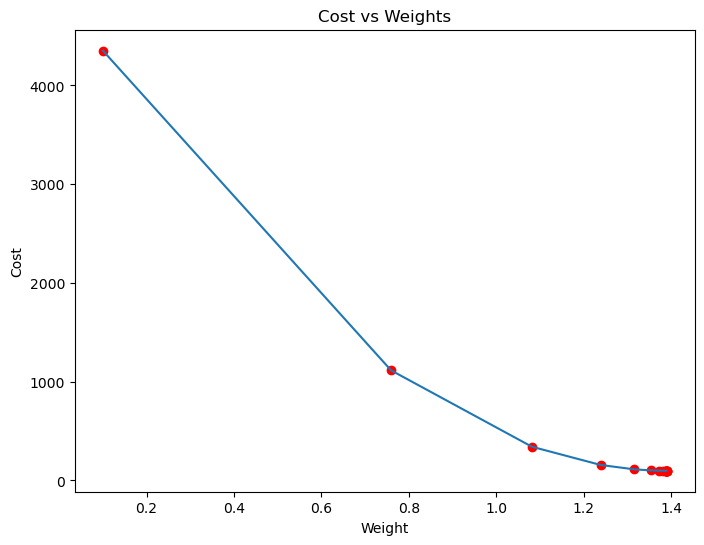

Estimated Weight: 1.389738813163012
Estimated Bias: 0.03509461674147458


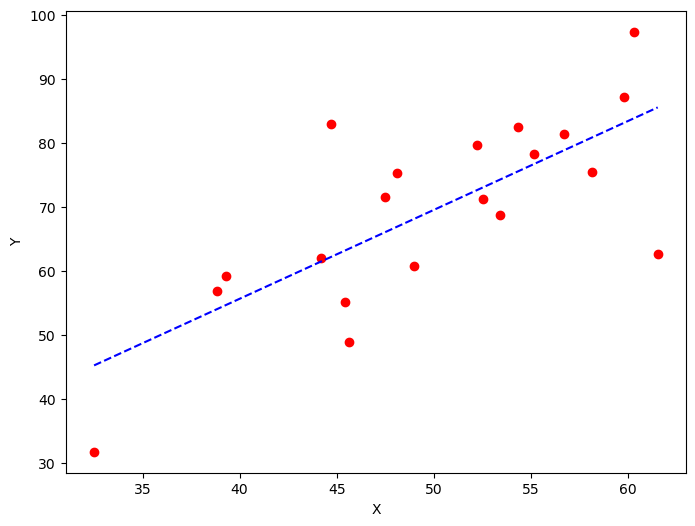

In [2]:
# Importing Libraries
import numpy as np
import matplotlib.pyplot as plt

def mean_squared_error(y_true, y_predicted):
	
	# Calculating the loss or cost
	cost = np.sum((y_true-y_predicted)**2) / len(y_true)
	return cost

# Gradient Descent Function
# Here iterations, learning_rate, stopping_threshold
# are hyperparameters that can be tuned
def gradient_descent(x, y, iterations = 1000, learning_rate = 0.0001, 
					stopping_threshold = 1e-6):
	
	# Initializing weight, bias, learning rate and iterations
	current_weight = 0.1
	current_bias = 0.01
	iterations = iterations
	learning_rate = learning_rate
	n = float(len(x))
	
	costs = []
	weights = []
	previous_cost = None
	
	# Estimation of optimal parameters 
	for i in range(iterations):
		
		# Making predictions
		y_predicted = (current_weight * x) + current_bias
		
		# Calculating the current cost
		current_cost = mean_squared_error(y, y_predicted)

		# If the change in cost is less than or equal to 
		# stopping_threshold we stop the gradient descent
		if previous_cost and abs(previous_cost-current_cost)<=stopping_threshold:
			break
		
		previous_cost = current_cost

		costs.append(current_cost)
		weights.append(current_weight)
		
		# Calculating the gradients
		weight_derivative = -(2/n) * sum(x * (y-y_predicted))
		bias_derivative = -(2/n) * sum(y-y_predicted)
		
		# Updating weights and bias
		current_weight = current_weight - (learning_rate * weight_derivative)
		current_bias = current_bias - (learning_rate * bias_derivative)
				
		# Printing the parameters for each 1000th iteration
		print(f"Iteration {i+1}: Cost {current_cost}, Weight \
		{current_weight}, Bias {current_bias}")
	
	
	# Visualizing the weights and cost at for all iterations
	plt.figure(figsize = (8,6))
	plt.plot(weights, costs)
	plt.scatter(weights, costs, marker='o', color='red')
	plt.title("Cost vs Weights")
	plt.ylabel("Cost")
	plt.xlabel("Weight")
	plt.show()
	
	return current_weight, current_bias


def main():
	
	# Data
	X = np.array([32.50234527, 53.42680403, 61.53035803, 47.47563963, 59.81320787,
		55.14218841, 52.21179669, 39.29956669, 48.10504169, 52.55001444,
		45.41973014, 54.35163488, 44.1640495 , 58.16847072, 56.72720806,
		48.95588857, 44.68719623, 60.29732685, 45.61864377, 38.81681754])
	Y = np.array([31.70700585, 68.77759598, 62.5623823 , 71.54663223, 87.23092513,
		78.21151827, 79.64197305, 59.17148932, 75.3312423 , 71.30087989,
		55.16567715, 82.47884676, 62.00892325, 75.39287043, 81.43619216,
		60.72360244, 82.89250373, 97.37989686, 48.84715332, 56.87721319])

	# Estimating weight and bias using gradient descent
	estimated_weight, estimated_bias = gradient_descent(X, Y, iterations=2000)
	print(f"Estimated Weight: {estimated_weight}\nEstimated Bias: {estimated_bias}")

	# Making predictions using estimated parameters
	Y_pred = estimated_weight*X + estimated_bias

	# Plotting the regression line
	plt.figure(figsize = (8,6))
	plt.scatter(X, Y, marker='o', color='red')
	plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='blue',markerfacecolor='red',
			markersize=10,linestyle='dashed')
	plt.xlabel("X")
	plt.ylabel("Y")
	plt.show()

	
if __name__=="__main__":
	main()


Optimal alpha1: [2.14052524]
Optimal alpha2: [-5.02361148]


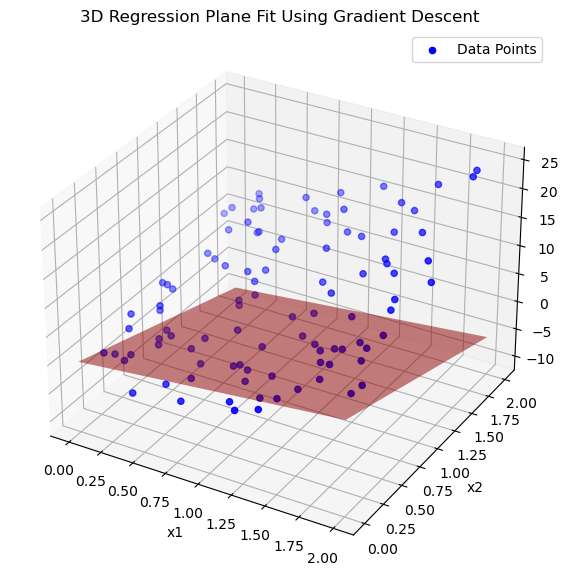

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate random data for x1, x2, and y
np.random.seed(42)  # For reproducibility
n_samples = 100
x1 = 2 * np.random.rand(n_samples, 1)  # 100 random values for x1
x2 = 2 * np.random.rand(n_samples, 1)  # 100 random values for x2

# Assuming a true relationship y = 4*x1^2 + 3*x1*x2 + 2.5*x2^2 - 5.5*x1 + noise
y = 4 * x1**2 + 3 * x1 * x2 + 2.5 * x2**2 - 5.5 * x1 + np.random.randn(n_samples, 1)

# Gradient Descent Parameters
learning_rate = 0.01
n_iterations = 1000
m = len(y)

# Random initialization of alpha1 and alpha2
alpha1 = np.random.randn(1)
alpha2 = np.random.randn(1)

# Gradient Descent Loop
for iteration in range(n_iterations):
    # Calculate the prediction using the formula alpha = y - alpha1*x1 + alpha2*x2
    alpha = y - alpha1 * x1 + alpha2 * x2

    # Compute the gradients
    gradient_alpha1 = -2/m * np.sum((y - alpha1 * x1 + alpha2 * x2) * x1)
    gradient_alpha2 = 2/m * np.sum((y - alpha1 * x1 + alpha2 * x2) * x2)

    # Update the parameters
    alpha1 = alpha1 - learning_rate * gradient_alpha1
    alpha2 = alpha2 - learning_rate * gradient_alpha2

# Output the final parameters
print(f"Optimal alpha1: {alpha1}")
print(f"Optimal alpha2: {alpha2}")

# Plotting the data points and the regression plane
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the original data points
ax.scatter(x1, x2, y, color='blue', label='Data Points')

# Create a mesh grid for x1 and x2
x1_mesh, x2_mesh = np.meshgrid(np.linspace(0, 2, 50), np.linspace(0, 2, 50))

# Calculate the plane values based on the optimized alpha1 and alpha2
y_mesh = alpha1 * x1_mesh + alpha2 * x2_mesh

# Plot the regression plane
ax.plot_surface(x1_mesh, x2_mesh, y_mesh, color='red', alpha=0.5, rstride=100, cstride=100)

# Labels and title
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
ax.set_title('3D Regression Plane Fit Using Gradient Descent')

plt.legend()
plt.show()
